In [1]:
import pandas as pd

df = pd.read_csv('_analytics_assignment_data.csv')
df

,date,num_orders,order_status,total_cbv,service
0,2016-01-01,180,Cancelled,76076000,GO-BOX
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD
3,2016-01-01,0,Cancelled,728000,GO-GLAM
4,2016-01-01,10,Cancelled,136500,GO-KILAT
...,...,...,...,...,...
3205,2016-04-01,0,Other,18200,GO-FOOD
3206,2016-04-01,0,Other,152880,GO-GLAM
3207,2016-04-01,10,Other,1556100,GO-MASSAGE
3208,2016-04-01,0,Other,61880,GO-RIDE


### Removing Go-Tix Services

In [2]:
df2 = df[df['service'] != 'GO-TIX']
df2

,date,num_orders,order_status,total_cbv,service
0,2016-01-01,180,Cancelled,76076000,GO-BOX
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD
3,2016-01-01,0,Cancelled,728000,GO-GLAM
4,2016-01-01,10,Cancelled,136500,GO-KILAT
...,...,...,...,...,...
3205,2016-04-01,0,Other,18200,GO-FOOD
3206,2016-04-01,0,Other,152880,GO-GLAM
3207,2016-04-01,10,Other,1556100,GO-MASSAGE
3208,2016-04-01,0,Other,61880,GO-RIDE


### Keep only Cancelled Status

In [3]:
df3 = df2[df2['order_status'] == 'Cancelled']
df3

,date,num_orders,order_status,total_cbv,service
0,2016-01-01,180,Cancelled,76076000,GO-BOX
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD
3,2016-01-01,0,Cancelled,728000,GO-GLAM
4,2016-01-01,10,Cancelled,136500,GO-KILAT
...,...,...,...,...,...
3176,2016-04-01,600,Cancelled,8372000,GO-MART
3177,2016-04-01,170,Cancelled,24560900,GO-MASSAGE
3178,2016-04-01,79390,Cancelled,1998902360,GO-RIDE
3179,2016-04-01,8550,Cancelled,327033980,GO-SEND


In [4]:
df3.isna().sum()

date            0
num_orders      0
order_status    0
total_cbv       0
service         0
dtype: int64

In [5]:
df3.dtypes

date            object
num_orders       int64
order_status    object
total_cbv        int64
service         object
dtype: object

### Create is_weekend flag predictor (saturday/sunday = 1, other days = 0)

In [6]:
from datetime import datetime
import numpy as np

df3['date'] = pd.to_datetime(df3['date'], format='%Y-%m-%d', errors='ignore')
df3['day_of_week'] = df3['date'].dt.weekday
df3['day_of_week'] = pd.to_numeric(df3['day_of_week'])


df3['is_weekend'] = [0 if x >= 0 and x<= 4 else 1 for x in df3['day_of_week']]
df3['month'] = df3['date'].dt.month
df3['day_of_month'] = df3['date'].dt.day

df3

<ipython-input-6-3439e0e767ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date'], format='%Y-%m-%d', errors='ignore')
<ipython-input-6-3439e0e767ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day_of_week'] = df3['date'].dt.weekday
<ipython-input-6-3439e0e767ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,date,num_orders,order_status,total_cbv,service,day_of_week,is_weekend,month,day_of_month
0,2016-01-01,180,Cancelled,76076000,GO-BOX,4,0,1,1
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN,4,0,1,1
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD,4,0,1,1
3,2016-01-01,0,Cancelled,728000,GO-GLAM,4,0,1,1
4,2016-01-01,10,Cancelled,136500,GO-KILAT,4,0,1,1
...,...,...,...,...,...,...,...,...,...
3176,2016-04-01,600,Cancelled,8372000,GO-MART,4,0,4,1
3177,2016-04-01,170,Cancelled,24560900,GO-MASSAGE,4,0,4,1
3178,2016-04-01,79390,Cancelled,1998902360,GO-RIDE,4,0,4,1
3179,2016-04-01,8550,Cancelled,327033980,GO-SEND,4,0,4,1


### One-hot encode month and day of week predictors

In [7]:
# df3 = df3[['day_of_month', 'month', 'day_of_week', 'is_weekend', 'service', 'total_cbv']]
# df3.dtypes


df3['day_of_month'] = df3['day_of_month'].astype('category')
df3['month'] = df3['month'].astype('category')
df3['day_of_week'] = df3['day_of_week'].astype('category')
df3['is_weekend'] = df3['is_weekend'].astype('category')

df3.dtypes
go_jek = df3


X_go_jek = pd.get_dummies(data=go_jek, columns=['month', 'day_of_week'])
# X_go_jek = X_go_jek.iloc[:,4:]
X_go_jek

<ipython-input-7-589dcc171939>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day_of_month'] = df3['day_of_month'].astype('category')
<ipython-input-7-589dcc171939>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3['month'].astype('category')
<ipython-input-7-589dcc171939>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,date,num_orders,order_status,total_cbv,service,is_weekend,day_of_month,month_1,month_2,month_3,month_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2016-01-01,180,Cancelled,76076000,GO-BOX,0,1,1,0,0,0,0,0,0,0,1,0,0
1,2016-01-01,10,Cancelled,1960140,GO-CLEAN,0,1,1,0,0,0,0,0,0,0,1,0,0
2,2016-01-01,28380,Cancelled,489898500,GO-FOOD,0,1,1,0,0,0,0,0,0,0,1,0,0
3,2016-01-01,0,Cancelled,728000,GO-GLAM,0,1,1,0,0,0,0,0,0,0,1,0,0
4,2016-01-01,10,Cancelled,136500,GO-KILAT,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,2016-04-01,600,Cancelled,8372000,GO-MART,0,1,0,0,0,1,0,0,0,0,1,0,0
3177,2016-04-01,170,Cancelled,24560900,GO-MASSAGE,0,1,0,0,0,1,0,0,0,0,1,0,0
3178,2016-04-01,79390,Cancelled,1998902360,GO-RIDE,0,1,0,0,0,1,0,0,0,0,1,0,0
3179,2016-04-01,8550,Cancelled,327033980,GO-SEND,0,1,0,0,0,1,0,0,0,0,1,0,0


### Standardize all predictors into z-score using the mean and standard deviation from train-period data only

In [8]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler


gojek = df3

X_gojek = gojek[['day_of_month', 'month', 'day_of_week', 'is_weekend']].values
y_gojek = gojek['total_cbv']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_gojek_vars = ohe.fit_transform(X_gojek).toarray()
y_gojek_vars = y_gojek

from sklearn.model_selection  import train_test_split
X_train_gojek, X_test_gojek, y_train_gojek, y_test_gojek = train_test_split(X_gojek_vars, y_gojek_vars, test_size = 0.2, random_state = 0)


# fit and transform the data
scaler = std_scaler.fit(X_train_gojek)
scaler.mean_
scaler.scale_

array([0.20802618, 0.16737399, 0.18557687, 0.16345577, 0.17491502,
       0.18557687, 0.16737399, 0.17855029, 0.17855029, 0.18557687,
       0.17491502, 0.18210266, 0.18210266, 0.17491502, 0.17119155,
       0.16737399, 0.17491502, 0.19230769, 0.18210266, 0.17491502,
       0.17855029, 0.18210266, 0.17855029, 0.18210266, 0.16737399,
       0.18557687, 0.18557687, 0.17119155, 0.17855029, 0.15101771,
       0.12732561, 0.47439057, 0.46323398, 0.47252548, 0.0975855 ,
       0.34851963, 0.35408401, 0.35680193, 0.3413123 , 0.34992711,
       0.35270917, 0.34567111, 0.45109982, 0.45109982])

### Question 1

In [9]:
go_food = X_go_jek[(X_go_jek['service'] == 'GO-FOOD') & (X_go_jek['day_of_month'] == 28) & (X_go_jek['month_2'] == 1)]
go_food.iloc[:,1:]

,num_orders,order_status,total_cbv,service,is_weekend,day_of_month,month_1,month_2,month_3,month_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
2001,15980,Cancelled,267558200,GO-FOOD,1,28,0,1,0,0,0,0,0,0,0,0,1



### Question 2

In [10]:
X_go_jek.head(6).iloc[:,3:]

,total_cbv,service,is_weekend,day_of_month,month_1,month_2,month_3,month_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,76076000,GO-BOX,0,1,1,0,0,0,0,0,0,0,1,0,0
1,1960140,GO-CLEAN,0,1,1,0,0,0,0,0,0,0,1,0,0
2,489898500,GO-FOOD,0,1,1,0,0,0,0,0,0,0,1,0,0
3,728000,GO-GLAM,0,1,1,0,0,0,0,0,0,0,1,0,0
4,136500,GO-KILAT,0,1,1,0,0,0,0,0,0,0,1,0,0
5,23933000,GO-MART,0,1,1,0,0,0,0,0,0,0,1,0,0


### Question 3

In [11]:
go_kilat = X_go_jek[(X_go_jek['service'] == 'GO-KILAT')]
go_kilat.head(6).sort_values('day_of_month')

,date,num_orders,order_status,total_cbv,service,is_weekend,day_of_month,month_1,month_2,month_3,month_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
4,2016-01-01,10,Cancelled,136500,GO-KILAT,0,1,1,0,0,0,0,0,0,0,1,0,0
106,2016-01-04,0,Cancelled,54600,GO-KILAT,0,4,1,0,0,0,1,0,0,0,0,0,0
142,2016-01-05,0,Cancelled,81900,GO-KILAT,0,5,1,0,0,0,0,1,0,0,0,0,0
179,2016-01-06,0,Cancelled,27300,GO-KILAT,0,6,1,0,0,0,0,0,1,0,0,0,0
215,2016-01-07,0,Cancelled,54600,GO-KILAT,0,7,1,0,0,0,0,0,0,1,0,0,0
246,2016-01-08,10,Cancelled,109200,GO-KILAT,0,8,1,0,0,0,0,0,0,0,1,0,0


### Question 4

In [12]:
###########################################################################################################################
# Go-Box

go_box = go_jek[go_jek['service'] == 'GO-BOX']

X_go_box = pd.get_dummies(data=go_box, columns=['month', 'day_of_week'])
X_go_box = X_go_box.iloc[:,5:]
X_go_box

y_go_box = go_box['total_cbv']
y_go_box

from sklearn.model_selection  import train_test_split
X_train_go_box, X_test_go_box, y_train_go_box, y_test_go_box = train_test_split(X_go_box, y_go_box, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_box, y_train_go_box)


y_pred_go_box = regressor.predict(X_test_go_box)
y_pred_go_box


###########################################################################################################################
# Go-Clean

go_clean = go_jek[go_jek['service'] == 'GO-CLEAN']

X_go_clean = pd.get_dummies(data=go_clean, columns=['month', 'day_of_week'])
X_go_clean = X_go_clean.iloc[:,5:]
X_go_clean

y_go_clean = go_clean['total_cbv']
y_go_clean

from sklearn.model_selection  import train_test_split
X_train_go_clean, X_test_go_clean, y_train_go_clean, y_test_go_clean = train_test_split(X_go_clean, y_go_clean, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_clean, y_train_go_clean)


y_pred_go_clean = regressor.predict(X_test_go_clean)
y_pred_go_clean

###########################################################################################################################
# Go-Food

go_food = go_jek[go_jek['service'] == 'GO-FOOD']

X_go_food = pd.get_dummies(data=go_food, columns=['month', 'day_of_week'])
X_go_food = X_go_food.iloc[:,5:]
X_go_food

y_go_food = go_food['total_cbv']
y_go_food

from sklearn.model_selection  import train_test_split
X_train_go_food, X_test_go_food, y_train_go_food, y_test_go_food = train_test_split(X_go_food, y_go_food, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_food, y_train_go_food)


y_pred_go_food = regressor.predict(X_test_go_food)
y_pred_go_food

###########################################################################################################################
# Go-Kilat

go_kilat = go_jek[go_jek['service'] == 'GO-KILAT']

X_go_kilat = pd.get_dummies(data=go_kilat, columns=['month', 'day_of_week'])
X_go_kilat = X_go_kilat.iloc[:,5:]
X_go_kilat

y_go_kilat = go_kilat['total_cbv']
y_go_kilat

from sklearn.model_selection  import train_test_split
X_train_go_kilat, X_test_go_kilat, y_train_go_kilat, y_test_go_kilat = train_test_split(X_go_kilat, y_go_kilat, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_kilat, y_train_go_kilat)


y_pred_go_kilat = regressor.predict(X_test_go_kilat)
y_pred_go_kilat

###########################################################################################################################
# Go-Mart

go_mart = go_jek[go_jek['service'] == 'GO-MART']

X_go_mart = pd.get_dummies(data=go_mart, columns=['month', 'day_of_week'])
X_go_mart = X_go_mart.iloc[:,5:]
X_go_mart

y_go_mart = go_mart['total_cbv']
y_go_mart

from sklearn.model_selection  import train_test_split
X_train_go_mart, X_test_go_mart, y_train_go_mart, y_test_go_mart = train_test_split(X_go_mart, y_go_mart, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_mart, y_train_go_mart)


y_pred_go_mart = regressor.predict(X_test_go_mart)
y_pred_go_mart

###########################################################################################################################
# Go-Massage

go_massage = go_jek[go_jek['service'] == 'GO-MASSAGE']

X_go_massage = pd.get_dummies(data=go_massage, columns=['month', 'day_of_week'])
X_go_massage = X_go_massage.iloc[:,5:]
X_go_massage

y_go_massage = go_massage['total_cbv']
y_go_massage

from sklearn.model_selection  import train_test_split
X_train_go_massage, X_test_go_massage, y_train_go_massage, y_test_go_massage = train_test_split(X_go_massage, y_go_massage, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_massage, y_train_go_massage)


y_pred_go_massage = regressor.predict(X_test_go_massage)
y_pred_go_massage

###########################################################################################################################
# Go-Ride

go_ride = go_jek[go_jek['service'] == 'GO-RIDE']

X_go_ride = pd.get_dummies(data=go_ride, columns=['month', 'day_of_week'])
X_go_ride = X_go_ride.iloc[:,5:]
X_go_ride

y_go_ride = go_ride['total_cbv']
y_go_ride

from sklearn.model_selection  import train_test_split
X_train_go_ride, X_test_go_ride, y_train_go_ride, y_test_go_ride = train_test_split(X_go_ride, y_go_ride, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_ride, y_train_go_ride)


y_pred_go_ride = regressor.predict(X_test_go_ride)
y_pred_go_ride


###########################################################################################################################
# Go-Send

go_send = go_jek[go_jek['service'] == 'GO-SEND']

X_go_send = pd.get_dummies(data=go_send, columns=['month', 'day_of_week'])
X_go_send = X_go_send.iloc[:,5:]
X_go_send

y_go_send = go_send['total_cbv']
y_go_send

from sklearn.model_selection  import train_test_split
X_train_go_send, X_test_go_send, y_train_go_send, y_test_go_send = train_test_split(X_go_send, y_go_send, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_send, y_train_go_send)


y_pred_go_send = regressor.predict(X_test_go_send)
y_pred_go_send


###########################################################################################################################
# Go-Shop

go_shop = go_jek[go_jek['service'] == 'GO-SHOP']

X_go_shop = pd.get_dummies(data=go_shop, columns=['month', 'day_of_week'])
X_go_shop = X_go_shop.iloc[:,5:]
X_go_shop

y_go_shop = go_shop['total_cbv']
y_go_shop

from sklearn.model_selection  import train_test_split
X_train_go_shop, X_test_go_shop, y_train_go_shop, y_test_go_shop = train_test_split(X_go_shop, y_go_shop, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_shop, y_train_go_shop)


y_pred_go_shop = regressor.predict(X_test_go_shop)
y_pred_go_shop

###########################################################################################################################
# Go-Glam

go_glam = go_jek[go_jek['service'] == 'GO-GLAM']

X_go_glam = pd.get_dummies(data=go_glam, columns=['month', 'day_of_week'])
X_go_glam = X_go_glam.iloc[:,5:]
X_go_glam

y_go_glam = go_glam['total_cbv']
y_go_glam

from sklearn.model_selection  import train_test_split
X_train_go_glam, X_test_go_glam, y_train_go_glam, y_test_go_glam = train_test_split(X_go_glam, y_go_glam, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_go_glam, y_train_go_glam)


y_pred_go_glam = regressor.predict(X_test_go_glam)
y_pred_go_glam

###########################################################################################################################


from sklearn.metrics import mean_absolute_error
mape_go_box = mean_absolute_error(y_test_go_box, y_pred_go_box)*100
mape_go_clean = mean_absolute_error(y_test_go_clean, y_pred_go_clean)*100
mape_go_food = mean_absolute_error(y_test_go_food, y_pred_go_food)*100
mape_go_kilat = mean_absolute_error(y_test_go_kilat, y_pred_go_kilat)*100
mape_go_mart = mean_absolute_error(y_test_go_mart, y_pred_go_mart)*100
mape_go_massage = mean_absolute_error(y_test_go_massage, y_pred_go_massage)*100
mape_go_ride = mean_absolute_error(y_test_go_ride, y_pred_go_ride)*100
mape_go_send = mean_absolute_error(y_test_go_send, y_pred_go_send)*100
mape_go_shop = mean_absolute_error(y_test_go_shop, y_pred_go_shop)*100
mape_go_glam = mean_absolute_error(y_test_go_glam, y_pred_go_glam)*100


mape  = pd.DataFrame({
    'services' : ['Go-Box', 'Go-Clean', 'Go-Food', 'Go-Kilat', 'Go-Mart', 'Go-Massage', 'Go-Ride', 'Go-Send', 'Go-Shop', 'Go-Glam'],
    'mape' : [mape_go_box, mape_go_clean, mape_go_food, mape_go_kilat, mape_go_mart, mape_go_massage, mape_go_ride, mape_go_send, mape_go_shop, mape_go_glam]
})

mape['mape'] = mape['mape'].astype(int)
mape.sort_values('mape')

,services,mape
0,Go-Box,-2147483648
2,Go-Food,-2147483648
6,Go-Ride,-2147483648
7,Go-Send,-2147483648
8,Go-Shop,-2147483648
3,Go-Kilat,9956636
9,Go-Glam,67916689
1,Go-Clean,111085961
4,Go-Mart,293801035
5,Go-Massage,335161299


### Question 5

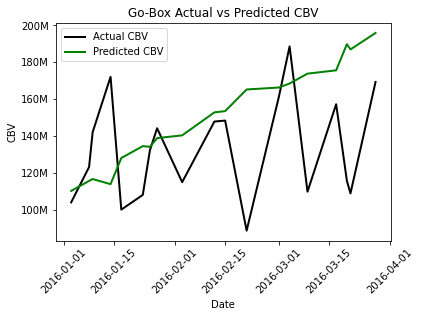

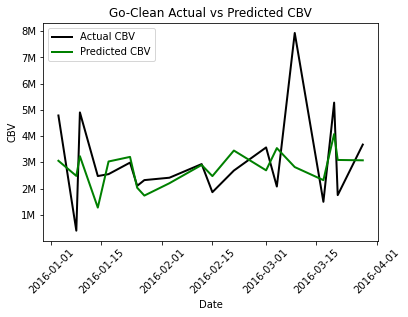

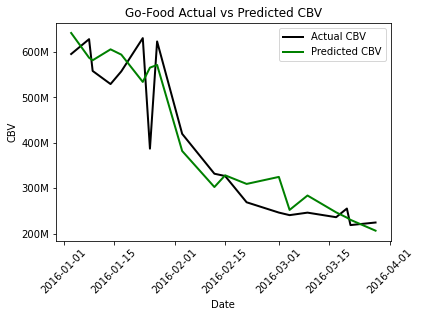

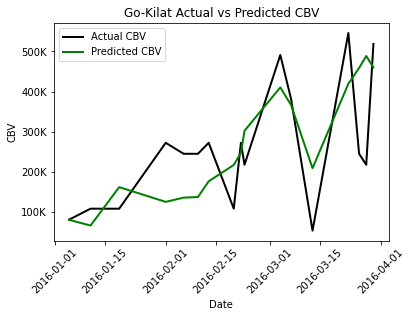

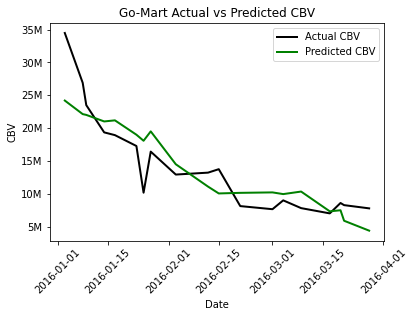

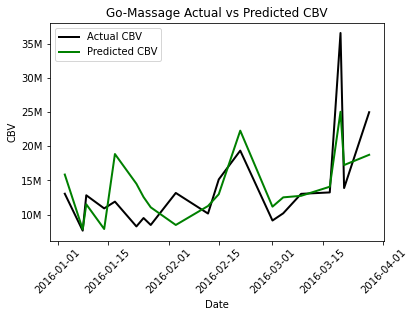

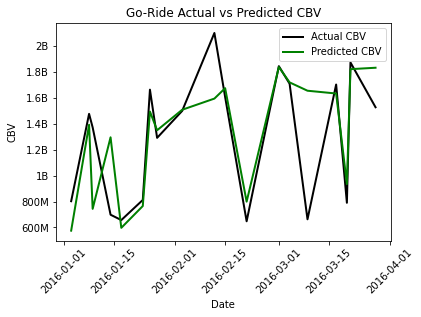

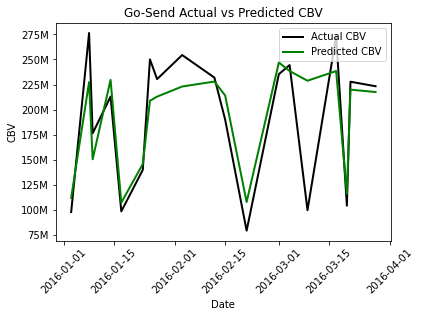

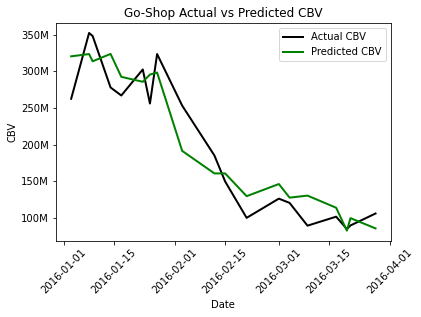

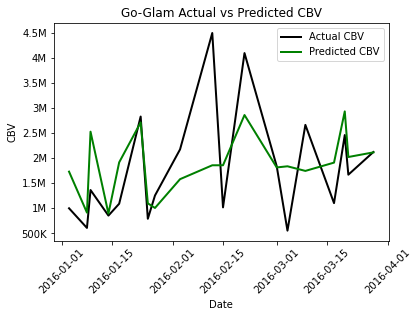

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick



def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format


###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
# Go-Box

df_gobox = pd.DataFrame({'Actual': y_test_go_box, 'Predicted': y_pred_go_box.astype(int)})
df_gobox

df2_gobox = go_box.merge(df_gobox, left_index=True, right_index=True)
df2_gobox = df2_gobox[['date', 'Actual', 'Predicted']]
df2_gobox

# Data
df3_gobox =pd.DataFrame({'x_values': df2_gobox['date'], 'y1_values': df2_gobox['Actual'], 'y2_values': df2_gobox['Predicted']})

# libraries
import matplotlib.pyplot as plt

# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gobox, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gobox, marker='', color='green', linewidth=2)
plt.title('Go-Box Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()




###########################################################################################################################
# Go-Clean

df_goclean = pd.DataFrame({'Actual': y_test_go_clean, 'Predicted': y_pred_go_clean.astype(int)})
df_goclean

df2_goclean = go_clean.merge(df_goclean, left_index=True, right_index=True)
df2_goclean = df2_goclean[['date', 'Actual', 'Predicted']]
df2_goclean

# Data
df3_goclean =pd.DataFrame({'x_values': df2_goclean['date'], 'y1_values': df2_goclean['Actual'], 'y2_values': df2_goclean['Predicted']})

# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_goclean, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_goclean, marker='', color='green', linewidth=2)
plt.title('Go-Clean Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()

###########################################################################################################################
# Go-Food

df_gofood = pd.DataFrame({'Actual': y_test_go_food, 'Predicted': y_pred_go_food.astype(int)})
df_gofood

df2_gofood = go_food.merge(df_gofood, left_index=True, right_index=True)
df2_gofood = df2_gofood[['date', 'Actual', 'Predicted']]
df2_gofood

# Data
df3_gofood =pd.DataFrame({'x_values': df2_gofood['date'], 'y1_values': df2_gofood['Actual'], 'y2_values': df2_gofood['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gofood, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gofood, marker='', color='green', linewidth=2)
plt.title('Go-Food Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()


###########################################################################################################################
# Go-Kilat

df_gokilat = pd.DataFrame({'Actual': y_test_go_kilat, 'Predicted': y_pred_go_kilat.astype(int)})
df_gokilat

df2_gokilat = go_kilat.merge(df_gokilat, left_index=True, right_index=True)
df2_gokilat = df2_gokilat[['date', 'Actual', 'Predicted']]
df2_gokilat

# Data
df3_gokilat =pd.DataFrame({'x_values': df2_gokilat['date'], 'y1_values': df2_gokilat['Actual'], 'y2_values': df2_gokilat['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gokilat, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gokilat, marker='', color='green', linewidth=2)
plt.title('Go-Kilat Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()

###########################################################################################################################
# Go-Mart

df_gomart = pd.DataFrame({'Actual': y_test_go_mart, 'Predicted': y_pred_go_mart.astype(int)})
df_gomart

df2_gomart = go_mart.merge(df_gomart, left_index=True, right_index=True)
df2_gomart = df2_gomart[['date', 'Actual', 'Predicted']]
df2_gomart

# Data
df3_gomart =pd.DataFrame({'x_values': df2_gomart['date'], 'y1_values': df2_gomart['Actual'], 'y2_values': df2_gomart['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gomart, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gomart, marker='', color='green', linewidth=2)
plt.title('Go-Mart Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()

###########################################################################################################################
# Go-Massage

df_gomassage = pd.DataFrame({'Actual': y_test_go_massage, 'Predicted': y_pred_go_massage.astype(int)})
df_gomassage

df2_gomassage = go_massage.merge(df_gomassage, left_index=True, right_index=True)
df2_gomassage = df2_gomassage[['date', 'Actual', 'Predicted']]
df2_gomassage

# Data
df3_gomassage =pd.DataFrame({'x_values': df2_gomassage['date'], 'y1_values': df2_gomassage['Actual'], 'y2_values': df2_gomassage['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gomassage, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gomassage, marker='', color='green', linewidth=2)
plt.title('Go-Massage Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()


###########################################################################################################################
# Go-Ride

df_goride = pd.DataFrame({'Actual': y_test_go_ride, 'Predicted': y_pred_go_ride.astype(int)})
df_goride

df2_goride = go_ride.merge(df_goride, left_index=True, right_index=True)
df2_goride = df2_goride[['date', 'Actual', 'Predicted']]
df2_goride

# Data
df3_goride =pd.DataFrame({'x_values': df2_goride['date'], 'y1_values': df2_goride['Actual'], 'y2_values': df2_goride['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_goride, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_goride, marker='', color='green', linewidth=2)
plt.title('Go-Ride Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()


###########################################################################################################################
# Go-Send

df_gosend = pd.DataFrame({'Actual': y_test_go_send, 'Predicted': y_pred_go_send.astype(int)})
df_gosend

df2_gosend = go_send.merge(df_gosend, left_index=True, right_index=True)
df2_gosend = df2_gosend[['date', 'Actual', 'Predicted']]
df2_gosend

# Data
df3_gosend =pd.DataFrame({'x_values': df2_gosend['date'], 'y1_values': df2_gosend['Actual'], 'y2_values': df2_gosend['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_gosend, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_gosend, marker='', color='green', linewidth=2)
plt.title('Go-Send Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()

###########################################################################################################################
# Go-Shop

df_goshop = pd.DataFrame({'Actual': y_test_go_shop, 'Predicted': y_pred_go_shop.astype(int)})
df_goshop

df2_goshop = go_shop.merge(df_goshop, left_index=True, right_index=True)
df2_goshop = df2_goshop[['date', 'Actual', 'Predicted']]
df2_goshop

# Data
df3_goshop =pd.DataFrame({'x_values': df2_goshop['date'], 'y1_values': df2_goshop['Actual'], 'y2_values': df2_goshop['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_goshop, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_goshop, marker='', color='green', linewidth=2)
plt.title('Go-Shop Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()

###########################################################################################################################
# Go-Glam

df_goglam = pd.DataFrame({'Actual': y_test_go_glam, 'Predicted': y_pred_go_glam.astype(int)})
df_goglam

df2_goglam = go_glam.merge(df_goglam, left_index=True, right_index=True)
df2_goglam = df2_goglam[['date', 'Actual', 'Predicted']]
df2_goglam

# Data
df3_goglam =pd.DataFrame({'x_values': df2_goglam['date'], 'y1_values': df2_goglam['Actual'], 'y2_values': df2_goglam['Predicted']})


# multiple line plots
plt.plot( 'x_values', 'y1_values', label='Actual CBV', data=df3_goglam, marker='', color='black', linewidth=2)
plt.plot( 'x_values', 'y2_values', label='Predicted CBV', data=df3_goglam, marker='', color='green', linewidth=2)
plt.title('Go-Glam Actual vs Predicted CBV')
plt.xlabel('Date')
plt.ylabel('CBV')
plt.xticks(rotation=45)

ay = plt.gca()
ay.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# show legend
plt.legend()

# show graph
plt.show()